<center><b><h1>COMPUTER VISION</h1></b></center>

<center><b><h1>IMAGE CLASSIFICATION USING DEEP LEARNING</h1></b></center><br>
<center>WENAREEBA INNOCENT  | Reg No : 2021/HD05/2315U</center>





# Image classificaiton Deep learning

Image classification is an instance where a computer is able to analyze an image , and be able to identify the class where a particular image belongs , in this research am using deep learning to handle the classification of crop images. The classes i have i have in the images are cassava and banana , i worked on a task of creating an image classification to predict the classes in an image. It creates bounding boxes on an original image that is used during prediction and training. If a photo is provided and has cassava and banana , it was able to add a bounding box , and show the class label either cassava or banana.


# Process of Classification

1. Annotating the dataset
2. Reviewing the annotated dataset
3. Loading the dataset in notebook
4. Training 
5. Validation
6. Prediction 

# Annotating the Dataset

Data annotation is the process of labeling the data available in various formats like text, video or images. For supervised machine learning labeled data sets are required, so that machine can easily and clearly understand the input patterns.

In my research i annotated the datasets provided which had two classes, cassava and banana , i annotated the dataset using a tool called makesense.ai which allows easy creation of labels and proper annotations, after annotating my dataset , i exported it in the formats of .csv, .yaml , and the yolo format. In this research i chose to use the yolo data format , since i was working with the yolo library to handle the task with ease.

# Importing Libraries

I imported the different libraries that i was going to use in the classification , i installed tensorflow , tensorboard , pytorch , and Ipython to be able to handle the data preprocessing, training , vizualization and to make the process work out smoothly.

# Install Tensorflow

I installed TensorFlow which is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. 

In [1]:
# install tensorflow 
# !pip install tensorflow==2.3.1

In [2]:
# install tensor board
# !pip install tensorboard==2.4.1

# Install Torch

I installed torch to also help me in handling the neural network that will handle the classification.

In [3]:
# install torch which is supposed to run yolo
# !pip install torch

In [4]:
#  import torch library
import torch

# Install IPython

IPython normaly called (Interactive Python) is a command shell for interactive computing in multiple programming languages, originally developed for the Python programming language, that offers introspection, rich media, shell syntax, tab completion, and history.

In [5]:
# install Ipython
# !pip install IPython

In [6]:
from IPython.display import Image #rendering predictions

#  Yolov5 Library

I used the yolo library , and YOLO which is an  acronym for 'You only look once', is an object detection algorithm that divides images into a grid system. Each cell in the grid is responsible for detecting objects within itself. it is one of the mostly used algorithms for object detection since its fast and accurate. With the usage of Yolo, the image is only passed once through the Fully convolutional neural network.The Network understands generalized object representation (This allowed them to train the network on real world images and predictions on artwork was still fairly accurate).

# Clone Yolov5 Repository

i Cloned the official repository of the library so i can be able to use it for custom object detection, to detect for me the banana, and the cassava from an image and then i was able to navigate to the directory and display the path to make sure that i have the repository cloned.

In [7]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 13462, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 13462 (delta 190), reused 243 (delta 176), pack-reused 13198
Receiving objects: 100% (13462/13462), 13.24 MiB | 140.00 KiB/s, done.
Resolving deltas: 100% (9249/9249), done.


In [8]:
cd yolov5

/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5


# Install Requirements.txt

I also installed the dependencies in the requirements.txt file, The requirements.txt is a file that lists all the dependencies for the project. Incase there are missing dependenceis in the yolo library that i needed to work on the object detection , i was able to install them and fix it from here.

In [9]:
!pip install -r requirements.txt

# Splitting the dataset

I had to go through another process where i splitted the dataset into training, and validation , where some dataset ratio was used in the training of the model and the other ration of the dataset was used for validation . i split my dataset in the sets of 80 (percent) for training and 20 (percent) for validation. The original dataset before split is the annotated dataset which had both the images and labels after annotations all in one directory, the images were in .jpg format and the labels were in .txt format.

In [10]:
# Splitting the dataset into train and test

import os
from random import choice
import shutil

#arrays to store file names
# storing images

imgs =[]
# storing text files
xmls =[]

# The path that will contain the images that are used in the training
trainPath = '/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/images/train'

# The validation path , which will house the images used for validation
valPath = '/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/images/val'

#THe path with the dataset that i divided into train and validataion
crsPath = '/home/wandie/notebook/jupyterenv/yolov5_Submit/data/ts/' 

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("Training images are : ",countForTrain)
print("Validation images are : ",countForVal)

Training images are :  200
Validation images are :  50


# Splitting the Labels

I also splitted the labels in my dataset so that they were divided into the training and the validation folders respectively.

In [11]:
# working on label splitting
trainimagePath = '/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/images/train'

# labels used in training
trainlabelPath = '/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/labels/train'

# path for validation images used in validation
valimagePath = '/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/images/val'

# path for validation for labels 
vallabelPath = '/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/labels/val'
    
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir   
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    
    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath) 

'/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/images/val/ts'

# Creating the dataset.yaml

To be able to train the model , i created a dataset.yaml file which had the path to the training images, and also the path to the validation images , which were splitted , and i had to describe my dataset by writing the number of classes in my dataset which were two classes (cassava and banana) , and also wrote the corresponding class names. I later saved the file as dataset.yaml so it can be detected in the training and also will be referencing to its path.

##  // train and val data
train: '../dataset/images/train/' <br>
val: '../dataset/images/val/'
## // number of classes
nc: 2
## //class names

names: ['banana','cassava']

# Training Process

I trained with the YOLOv5 , from the library that i cloned and it is the one responsible for training the dataset, i trained with with with a batch size of 16 , and 30 epochs , and the dataset file is dataset.yml which should be able to use the algorithm to check for where my data is . and then will create the yolov5s.pt which is in the files of the cloned yolo Repository.


In [12]:
# !pip install comet_ml
# !python -m pip uninstall -y comet_ml

In [13]:
# !pip install clearml
# !python -m pip uninstall -y clearml

In [14]:
# !pip uninstall wandb
# !python -m pip uninstall -y wandb

In [15]:
# Training the dataset
!python train.py --img 160 --batch 16 --epochs 30 --data /home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/home/wandie/notebook/jupyterenv/yolov5_Submit/dataset/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=160, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.8.10 torch-1.12.1+cu102 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t

       5/29         0G     0.1048    0.03828    0.01056         92        160: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        301        253      0.024      0.169     0.0155    0.00373

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       6/29         0G     0.1023    0.03903   0.007581         76        160: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        301        253     0.0354      0.198     0.0229    0.00589

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       7/29         0G    0.09997    0.03562   0.004947         43        160: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        301        253     0.0359      0.303     0.0177    0.00492

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       8/2

Optimizer stripped from runs/train/exp/weights/last.pt, 14.2MB
Optimizer stripped from runs/train/exp/weights/best.pt, 14.2MB

Validating runs/train/exp/weights/best.pt...
Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
                 Class     Images  Instances          P          R      mAP50   
                   all        301        253      0.157      0.749      0.162     0.0786
                banana        301         82      0.162      0.902      0.173     0.0956
               cassava        301        171      0.152      0.596       0.15     0.0616
Results saved to runs/train/exp


# Results After Training

<b>After the training has been done successfuly , the model will now be saved in the weights directory <b> , which is found in runs/train/exp/weights , and then we use it for evaluation as in the tensorboards that shows how the model performed.

I then get my results and they are stored in the folder , runs/train/exp , runs is a directory in yolov5 which normaly contains the results of the dataset after training the annotated dataset. Inside the exp folder, it has the weights folde which has the best.pt, and the last.pt where we use the best.pt in predictions. In the same folder exp , it has the results.txt which stores the different information for respective epochs and also there are files that show the output of the annotated dataset , whereby the iamges are marked with a class attached to it, which is the predictions of the dataset. In my case it was able to show the image and marked the class for cassava and banana.


# Evaluate Custom Crop Dataset with YOLOv5 Detector Performance

The results after the training are stored in the runs/train/exp and it contains various curves and visual metrics which an be used in testing how the model works like the precision , recall. To vizualize these metrics i used the tensor board which is an interactive tool to see the results . 

Training losses and performance metrics are also logged to Tensorboard and a custom results.txt logfile which is plotted as results.png (below) after training completes.



In [16]:
# test the algorithm
# Explore the metrics recorded during training using tensor board
%load_ext tensorboard
%tensorboard --logdir runs

# Resultant sample image with the results

 I also explore how the model works and how the labels were predicted on the different images, the output shows bounding boxes on the different images from the sample of the dataset.

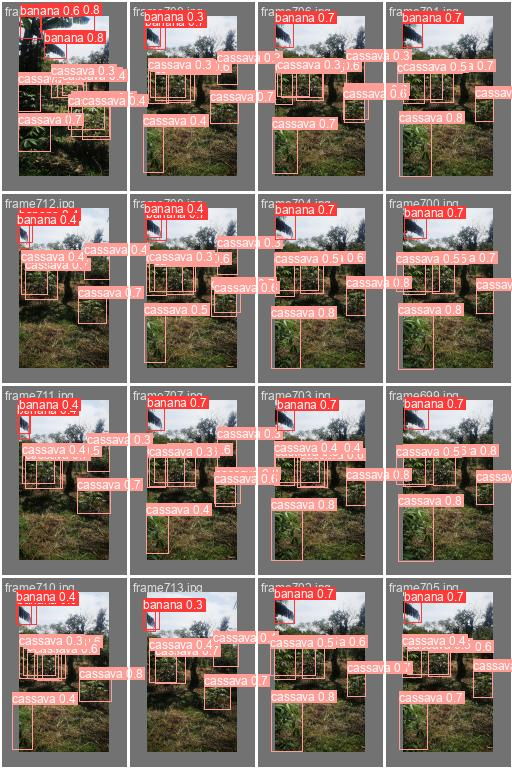

In [17]:
# show sample image recorded in the prediction
Image(filename='runs/train/exp/val_batch0_pred.jpg', width=1000)

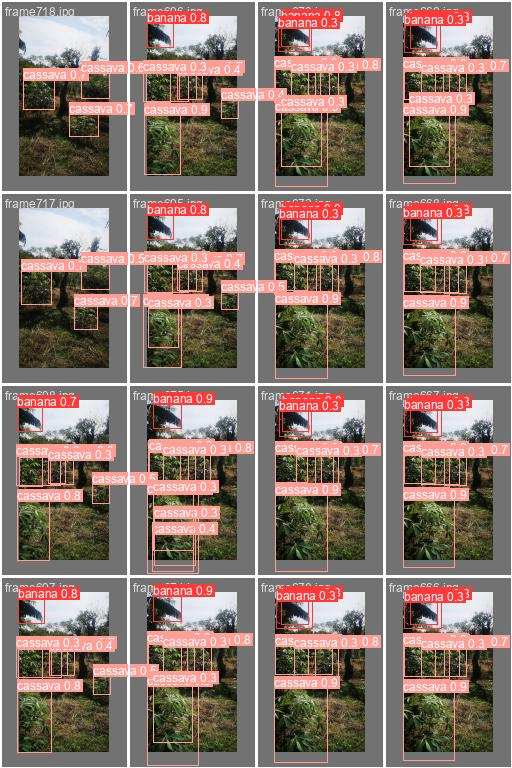

In [18]:
# show sample image recorded in the prediction
Image(filename='runs/train/exp/val_batch1_pred.jpg', width=1000)

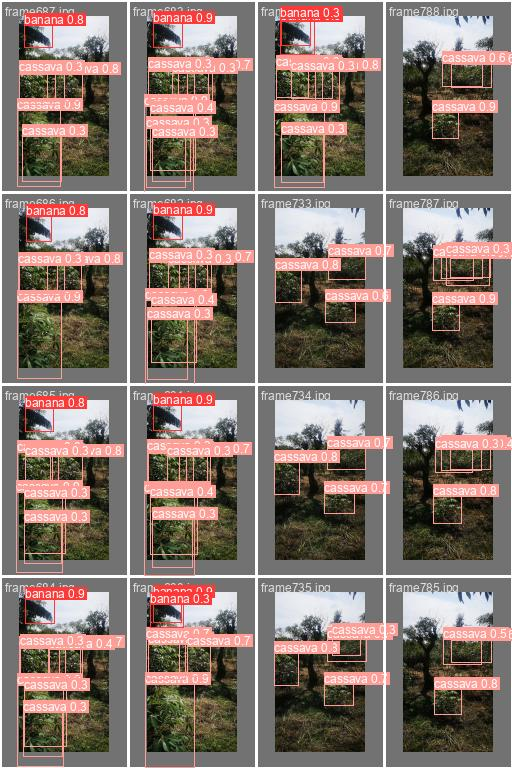

In [19]:
# show sample image recorded in the prediction
Image(filename='runs/train/exp/val_batch2_pred.jpg', width=1000)

## Vizualize the dataset after training

ClearML is completely integrated into YOLOv5 to track the experimentation, manage dataset versions and even remotely execute training runs.I was able to enable ClearML by installing clearml using pip.


In [20]:
# VIZUALZE
# !pip install clearml

In [21]:
# 
# !pip install wandb

In [22]:
# # vizualize

# from utils.plots import plot_results 
# plot_results(save_dir='runs/train/exp/results.png')  

# PREDICTION ON IMAGES

In my prediction , i used a detect.py file that is in the Yolov5 directory, with the best.pt weights, to be able to do the prediction on a custom image which is brought after training. The results for the detection will are saved in the directory runs/detect/exp. To handle the prediction i inserted the image to predict in the directory runs/train/exp/ then i was able to the image path.

Here i tested the predictions of the model on a single image, where i was able to display the result, then i also predicted on an array of images which i placed in a folder runs/train/exp/predict and applied the weights on it to display the different predictions.

In [23]:
# predict array of images
!python detect.py --source runs/train/exp/predict --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=runs/train/exp/predict, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.8.10 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/12 /home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/train/exp/predict/frame404.jpg: 640x384 11 bananas, 28 cassavas, 244.1ms
image 2/12 /home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/train/exp/predict/frame405.jpg: 640x384 10 bananas, 24 cassavas, 243.9ms
image 3/12 /home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/train/exp/p

# DISPLAY CUSTOM (SINGLE) PREDICTED IMAGE

Here i display the image that was stored in the runs/detect/exp which was recorded after prediction. 

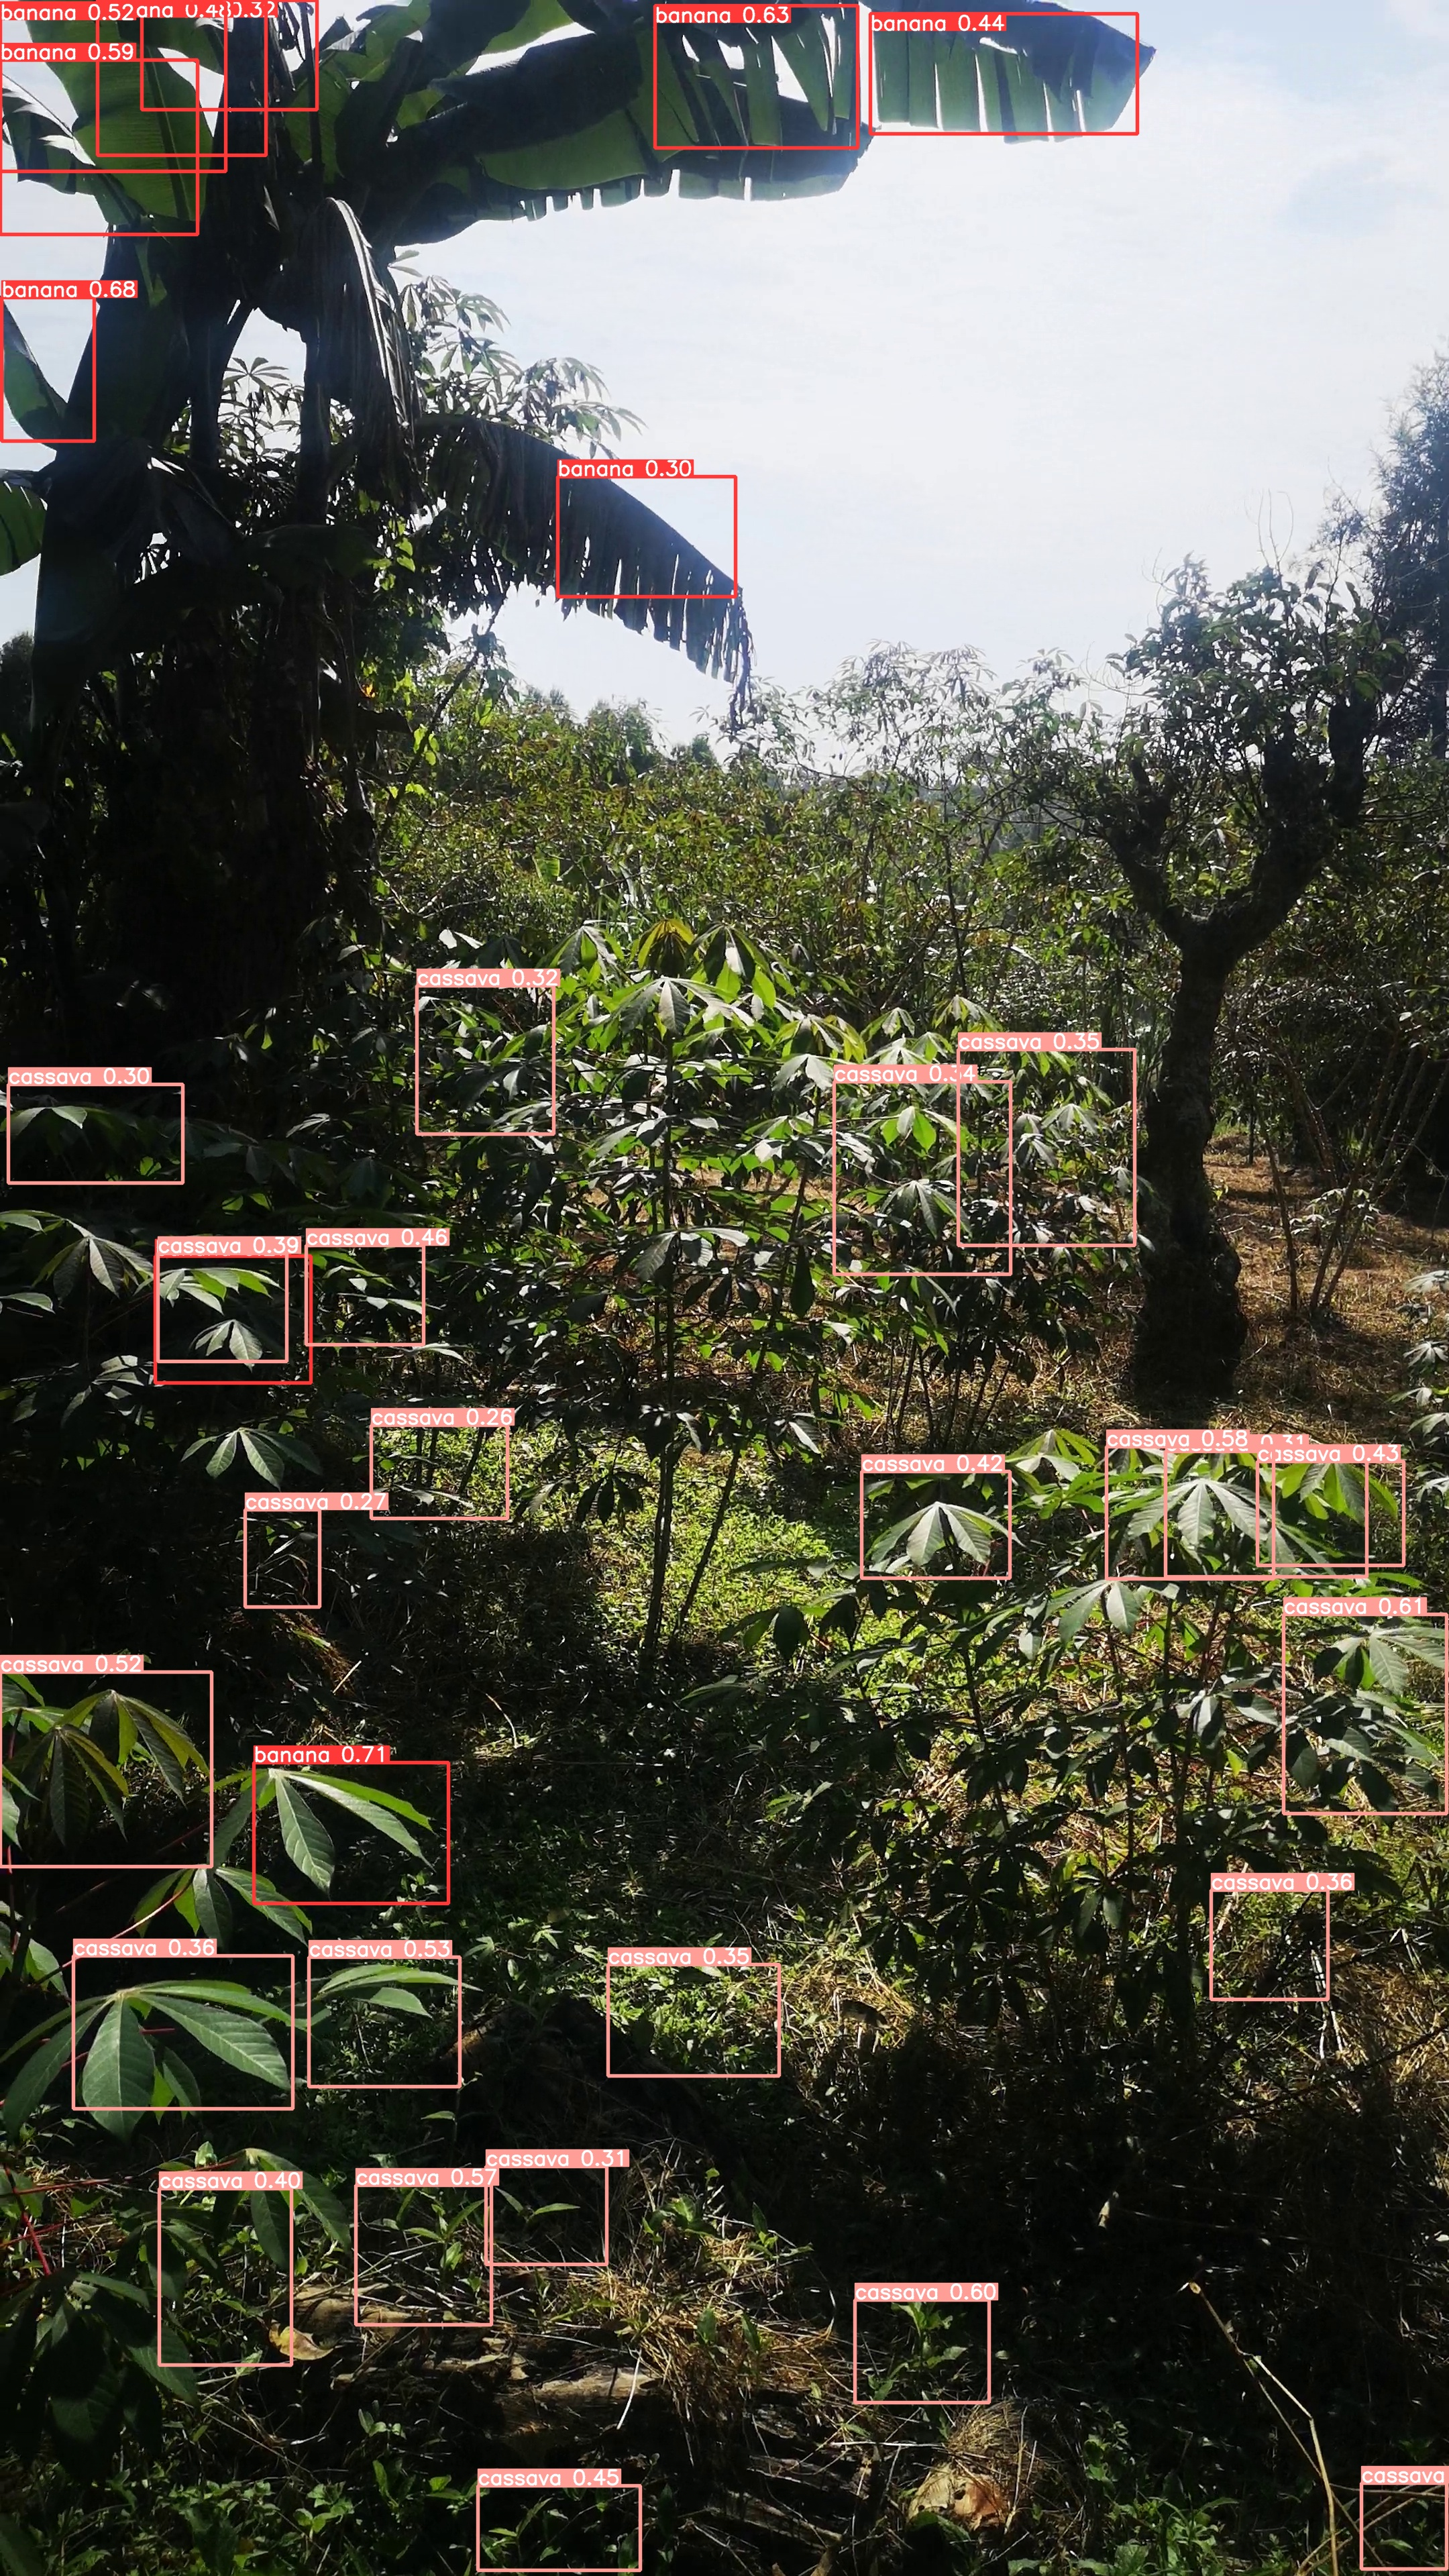

In [24]:
# predicted image
Image(filename='runs/detect/exp/frame405.jpg', width=416)

# DISPLAY CUSTOM (MULTIPLE) PREDICTED IMAGES

Here i display multiple images predicted , that was stored in the runs/detect/exp which was recorded after prediction. 

/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame417.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame407.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame406.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame416.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame423.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame405.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame420.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame421.jpg
/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/predicted/frame419.jpg


<Figure size 432x288 with 0 Axes>

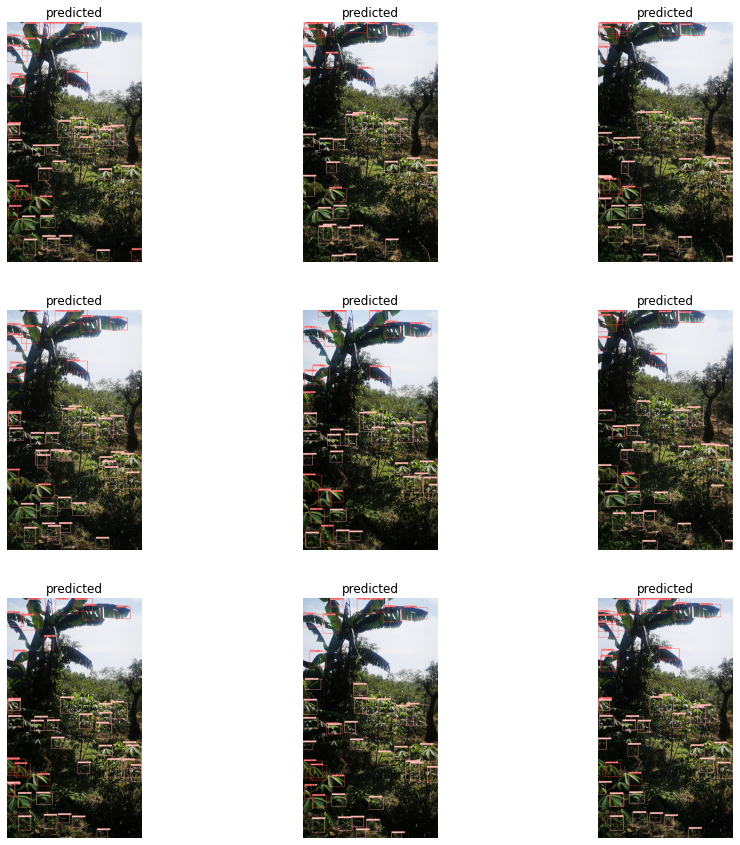

In [56]:
# plot cropped dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os


directory=os.listdir('/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict')
for each in directory:
    plt.figure()
    currentFolder = '/home/wandie/notebook/jupyterenv/yolov5_Submit/yolov5/runs/detect/exp/predict/' + each
    plt.figure(figsize=(15,15))
    for i, file in enumerate(os.listdir(currentFolder)[0:9]):
      fullpath = currentFolder+ "/" + file
      print(fullpath)
      # read full path
      img=mpimg.imread(fullpath)
      # pick file name
      file_name = os.path.basename(currentFolder)
      ax = plt.subplot(3,3, i+1)
      plt.axis("off")
      plt.title(file_name)
      plt.imshow(img)

# METRICS EVALUATION PLOTS

This is the results image that i previously saved and vizualized in the tensor board which shows how the model performed.

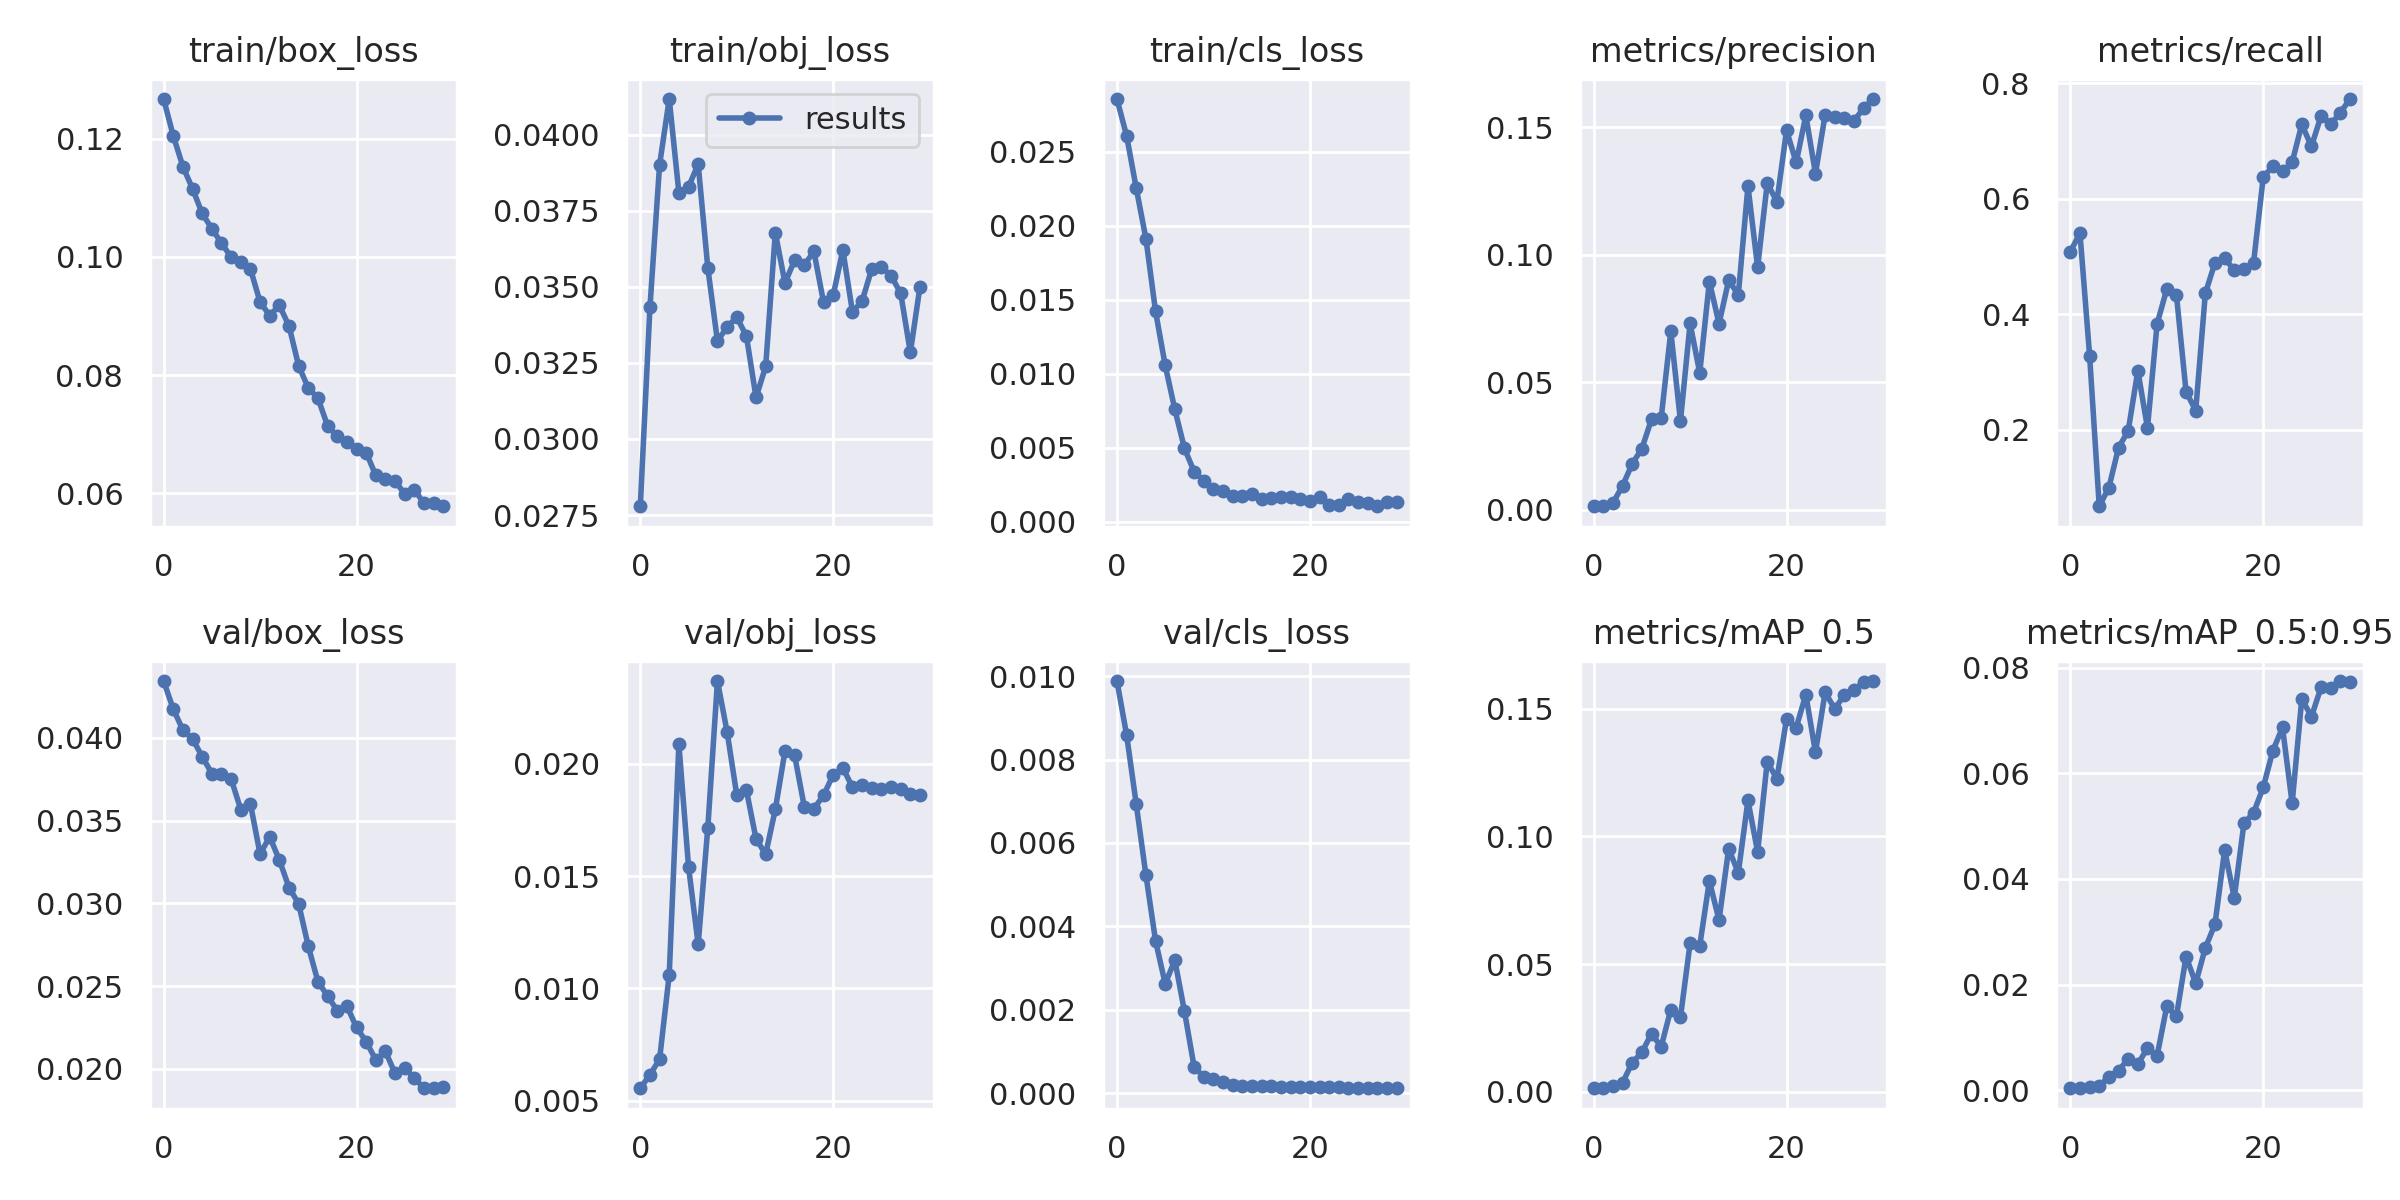

In [57]:
# predicted image
Image(filename='runs/train/exp/results.png', width=1000)

# Precision Confident Curve

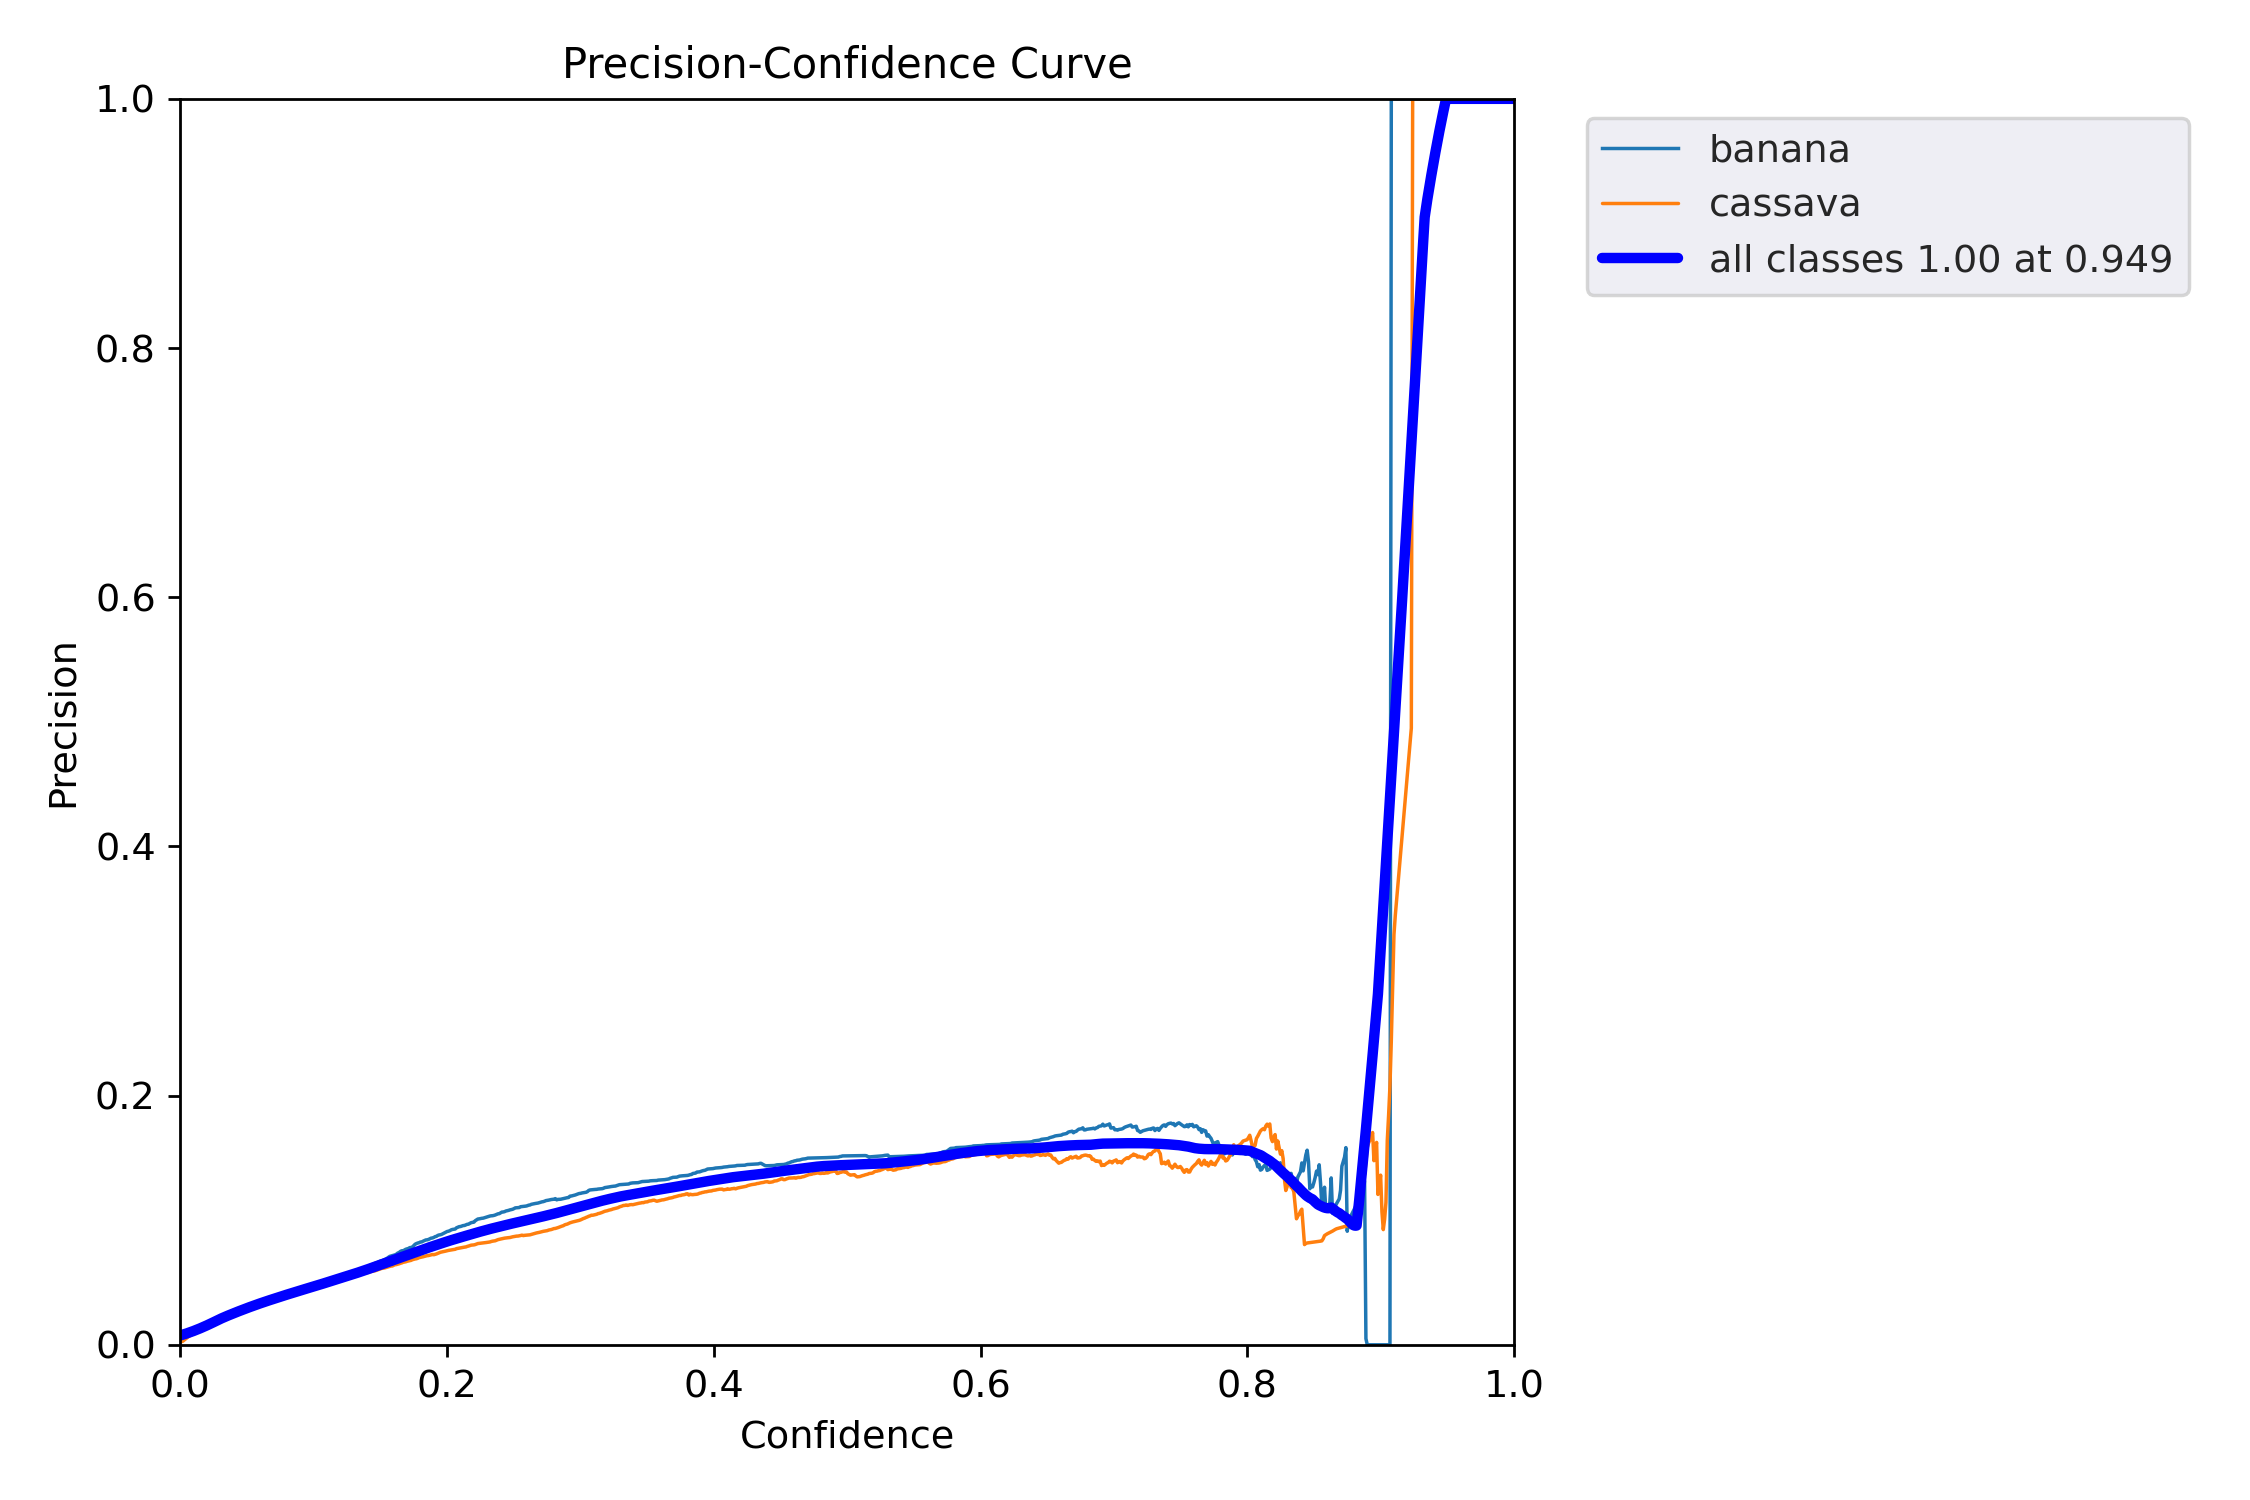

In [58]:
# precision confident curve
Image(filename='runs/train/exp/P_curve.png', width=500)

# Precision Recall Curve

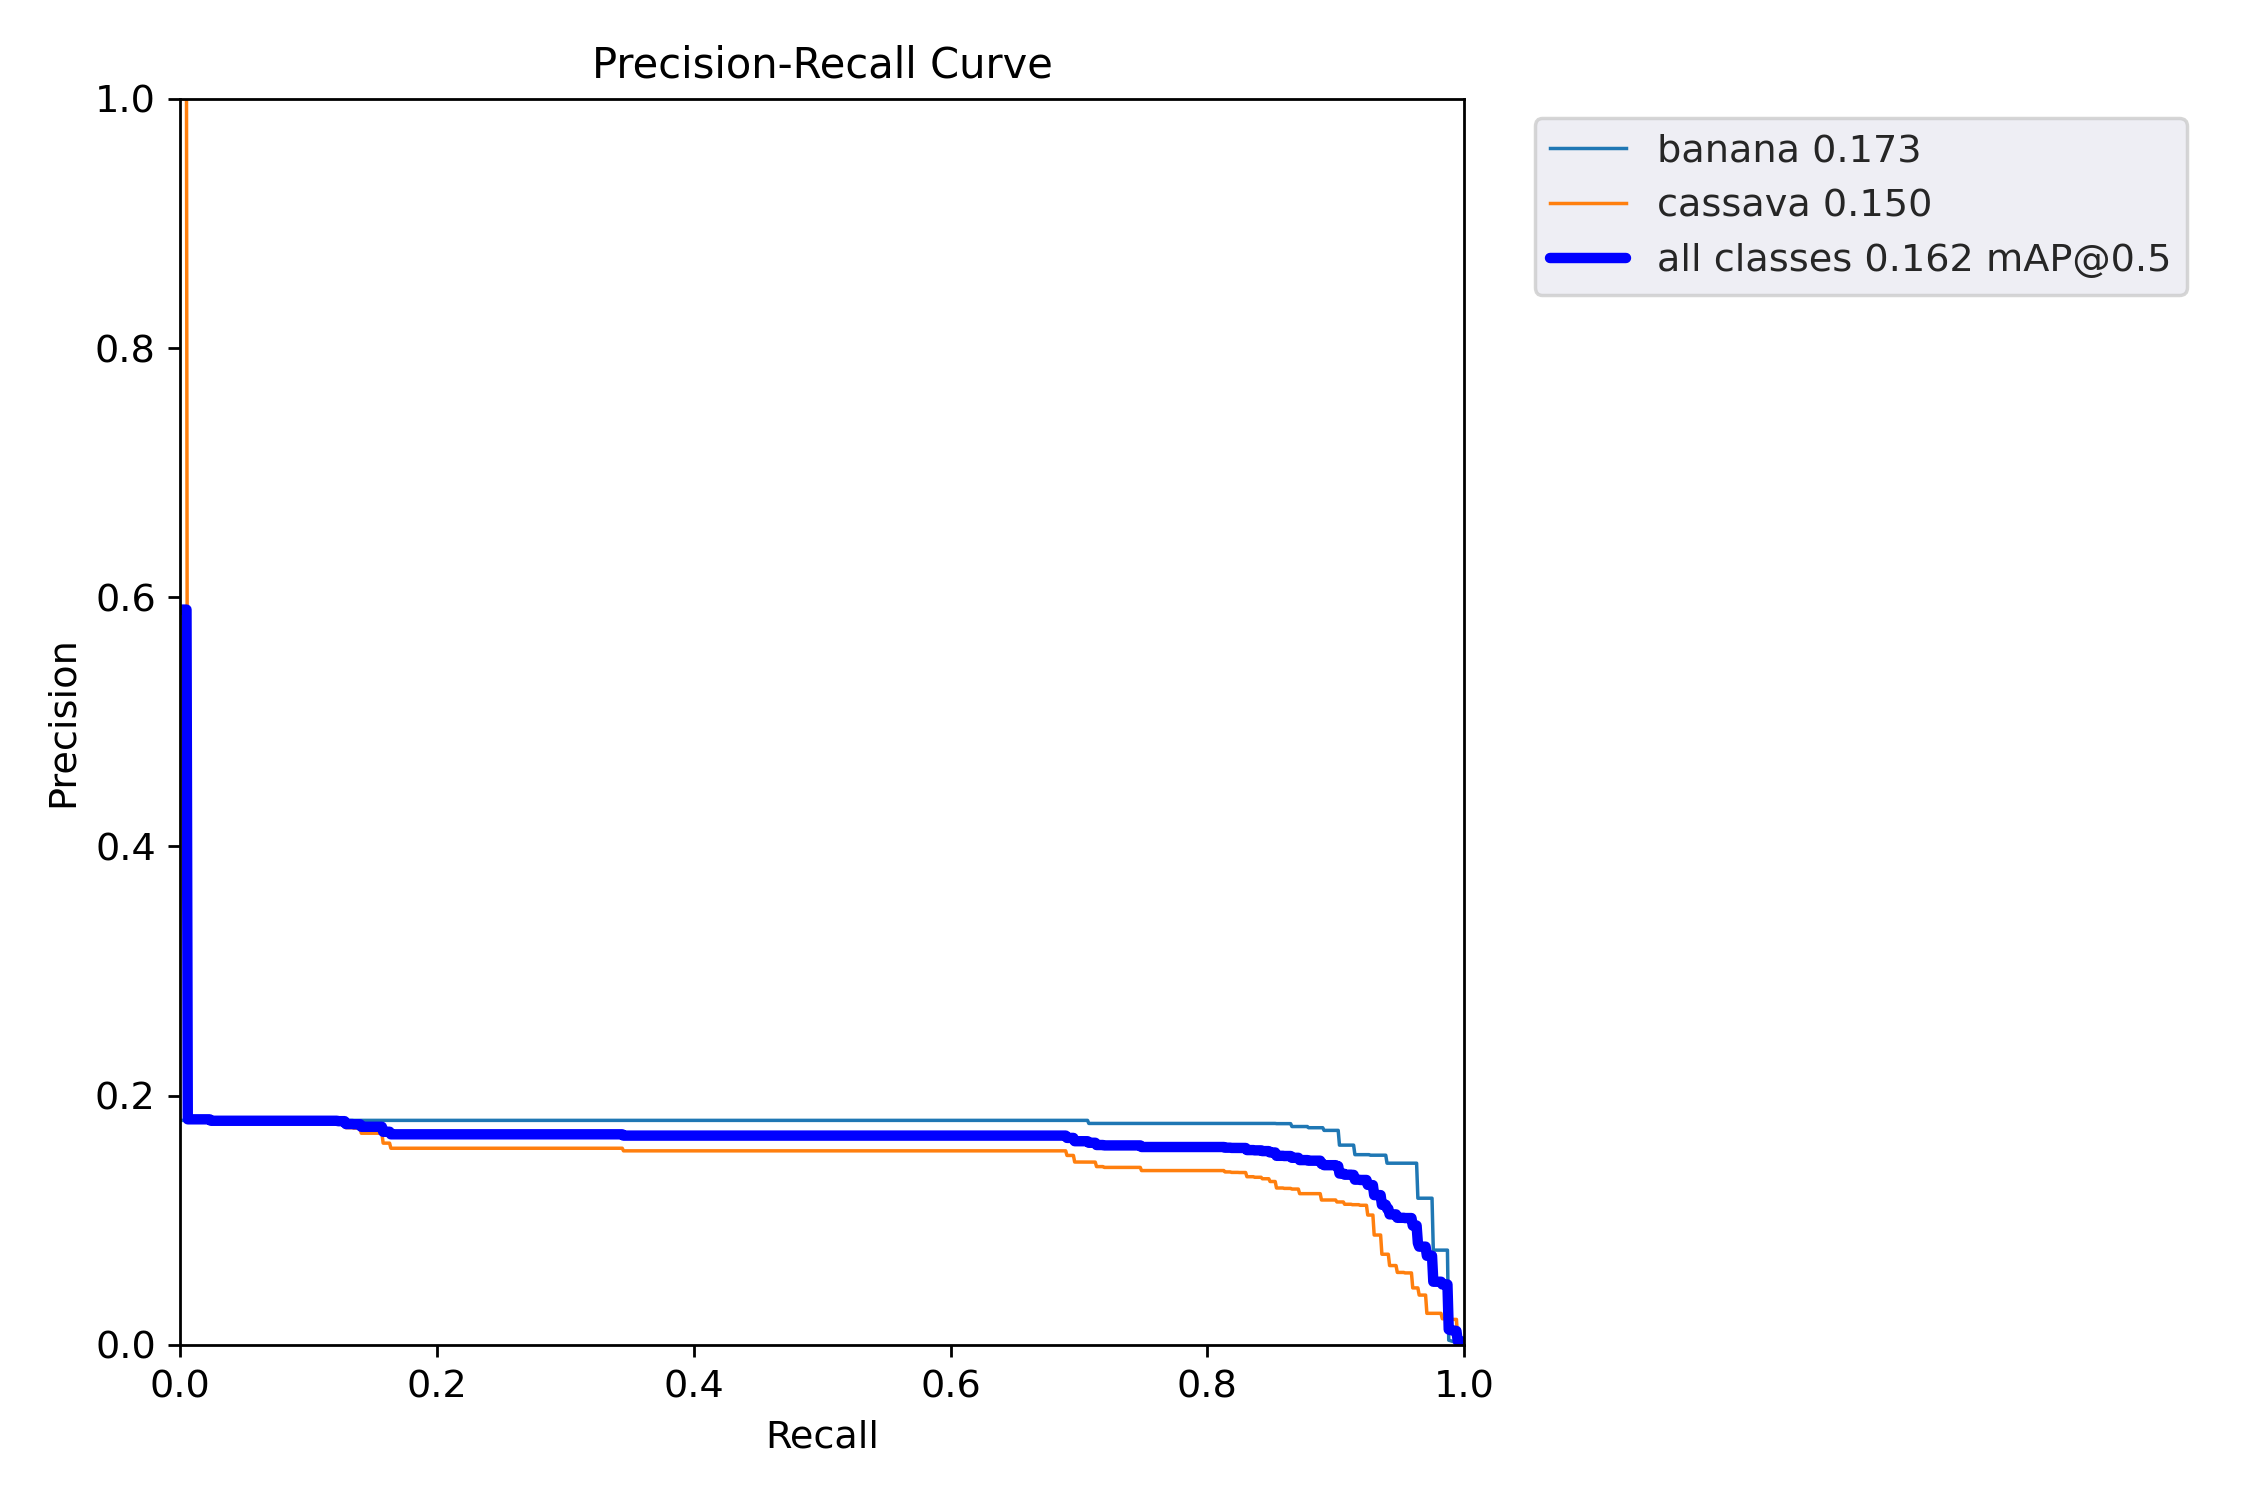

In [59]:
# precision recall curve
Image(filename='runs/train/exp/PR_curve.png', width=500)

# Recall Confidence Curve

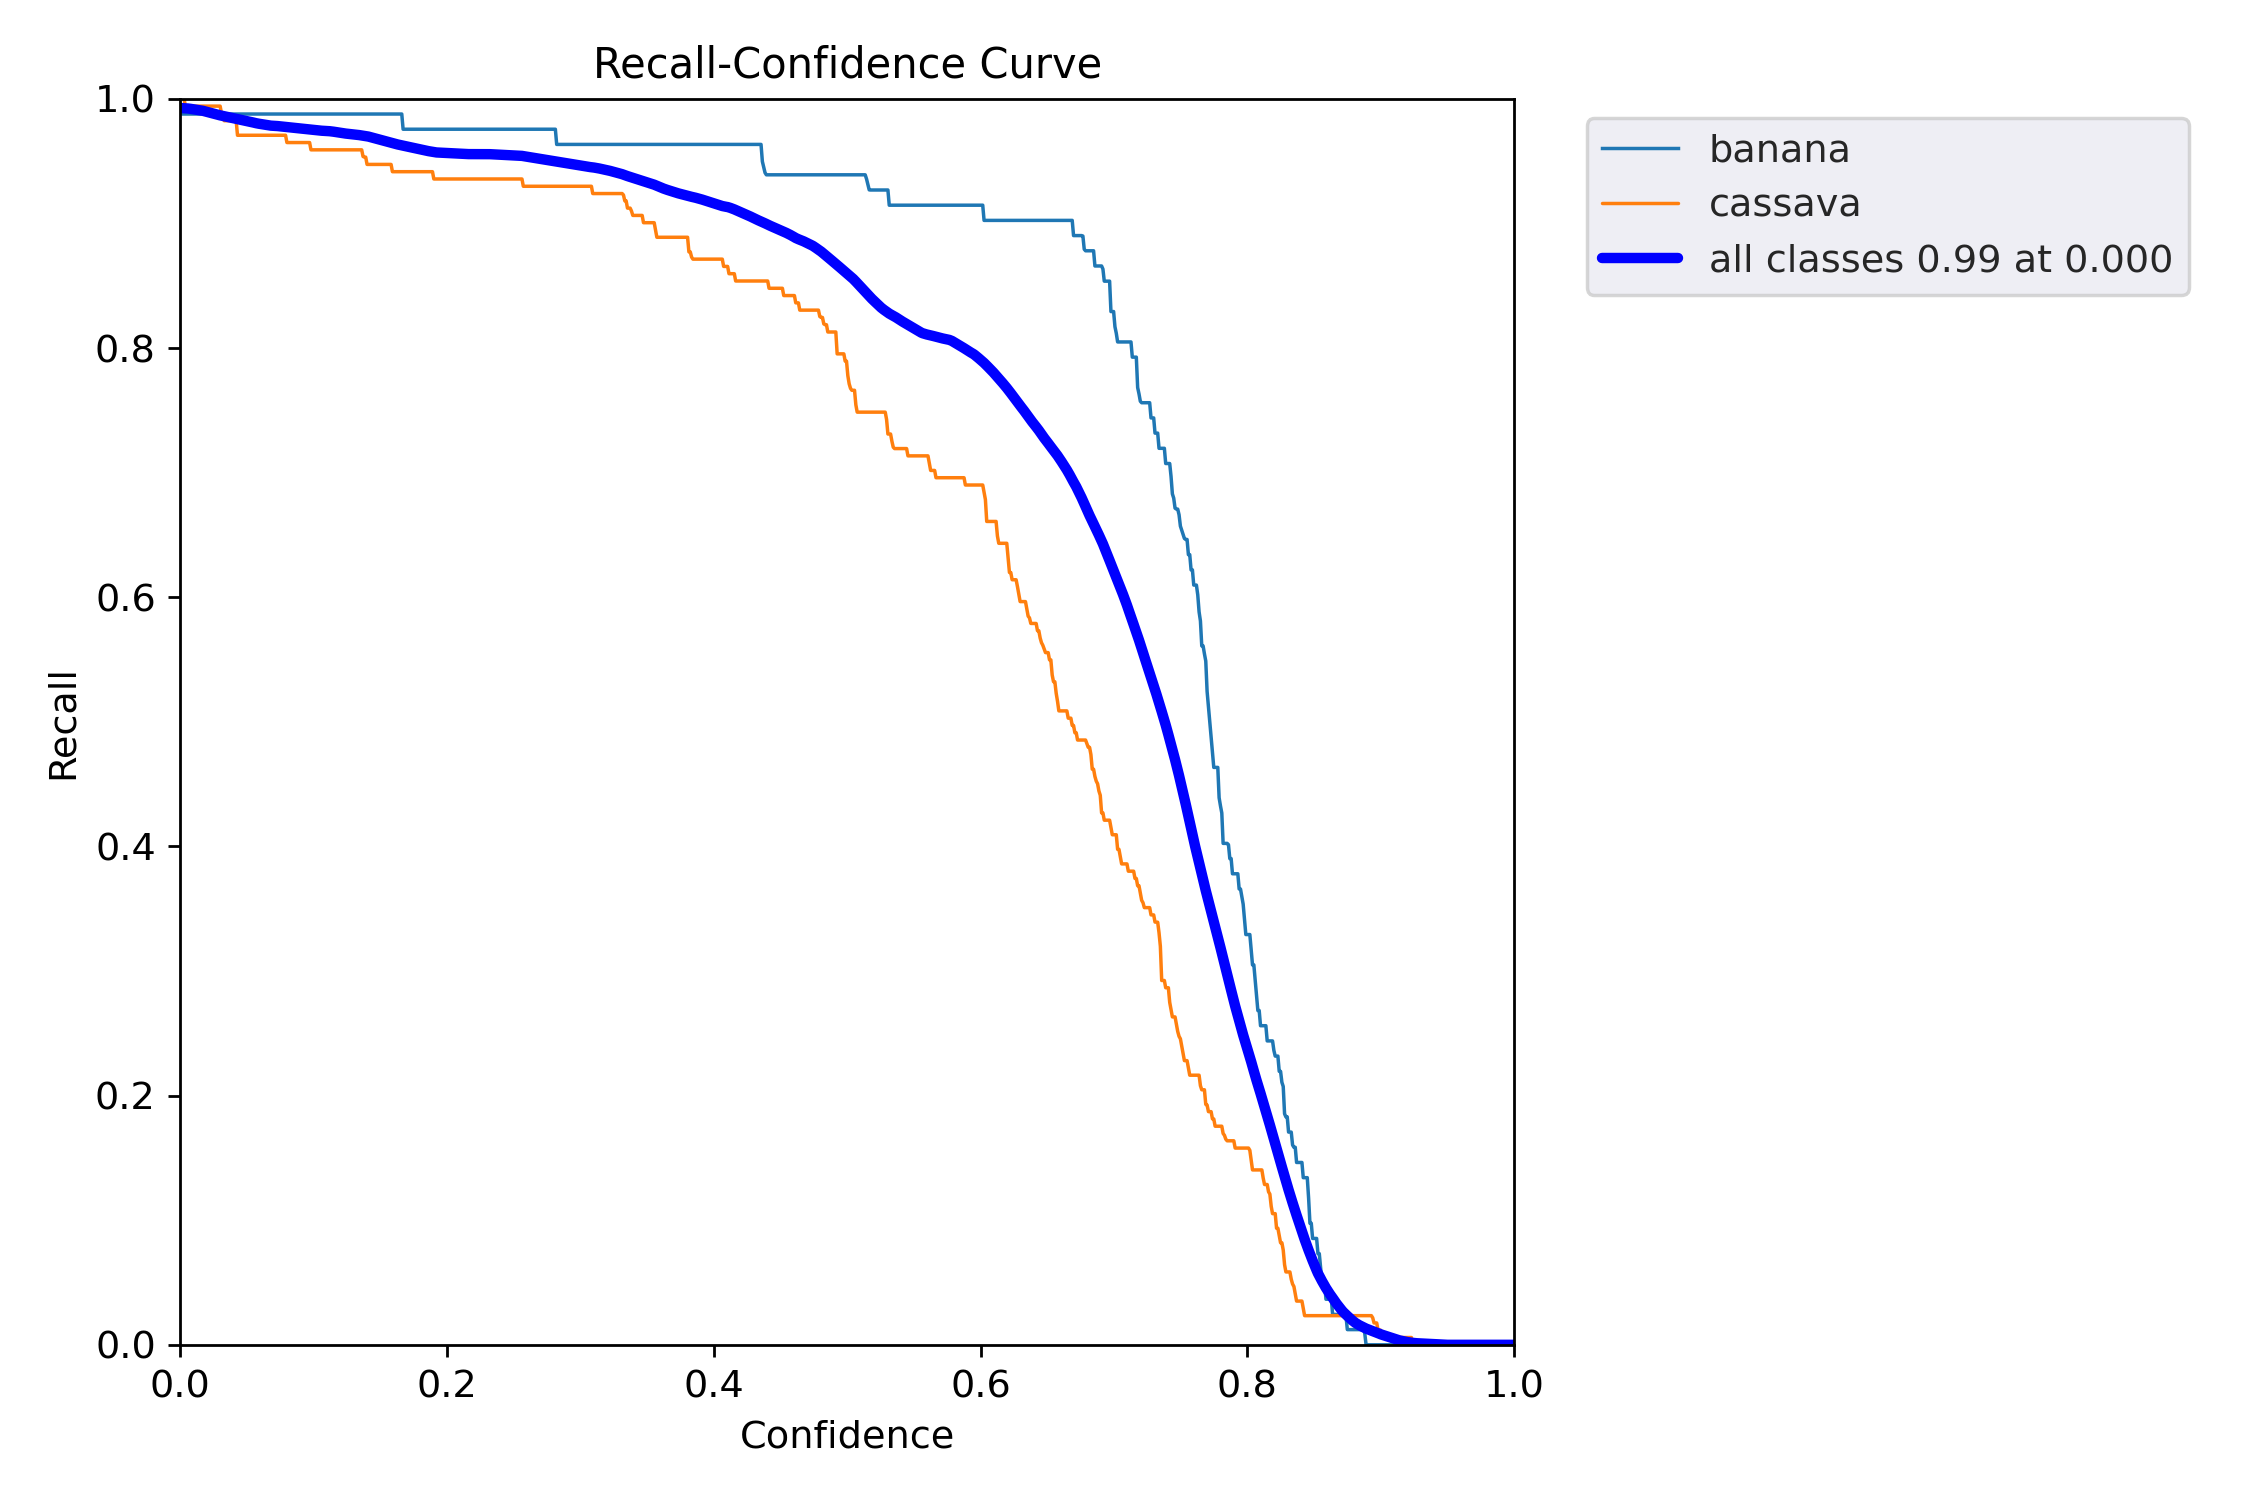

In [60]:
# recall confidence curve
Image(filename='runs/train/exp/R_curve.png', width=500)

# ANALYSIS OF THE RESULTS

In  this research , i used Yolov5 , Tensorflow, Pytorch  ,Ipython library as my base to be able to work on this classification of images which were annotated. I splited my dataset to training(train) and validation (val) sets then i trained my model to predict the annotated image class and draw a bounding box on each image to show the sections which had a banana or cassava. <br>


<b>Predicted image preview</b> <br>
After training , i previewed one of the images that were generated to see if it was able to detect the classes of cassava and banana , and it was able to create multiple sections which show a bounding box on cassava and banana and it was correctly predicted . It stored this image that was predicted in runs/train/exp <br>


<b>Prediction on custom (new) images </b> <br>
After verifying that it is able to predict , i then added new images in the runs/train/exp/predict directory, where i created a directory predict/ and added custom images . I ran the code to predict for me the custom images and it was able to go through the process successfuly and saved the custom images in the directory runs/detect/exp where i was able to see them . <br>

<b>Previewing the custom (new) predicted images </b><br>
To preview my resutls in the notebook i had to extract the images from the runs/detect/exp directory. I first previewed one image to the notebook and it had the classes correctly labeled . I Then previewed all the images in the same directory to show all of them at once . <br>


<b>Conclusion </b><br>
In this research i was able to successfuly , work with the annotated images and predict on custom images, to correctly label images which had cassava and banana , and create a bounding box which showed the cassava and banana. The results on the graphics , confusion matrix and the other vizualizations as shown in the graphs and illustrations also showed that the model worked well. 
